## Performance characterization

Task heterogeneity with variant ratio shows different resource utilization. The gaps between empirical and theoretical lines may indicate overheads of processing tasks.

In [2]:
%matplotlib inline
import pandas as pd

## Configuration
- 3 compute nodes: 40 cores * 3 (120 cores in total) 
- 120 tasks in total
- 3 types of tasks; 1000s/100s/10s
- ratio range from 1:1:1, 2:1:1, 4:1:1, and 10:1:1 (variant)



### Equation for theoretical resource utilization

$$RU (percentile) = 100 \times (\frac{T_A}{TTX} \times \frac{n_A}{N_{core}} + \frac{T_B}{TTX} \times \frac{n_B}{N_{core}} + \frac{T_C}{TTX} \times \frac{n_C}{N_{core}})$$

In [2]:
data_1000s = {"40-40-40": 
              ["1x (40-40-40)", 28.148, 100 * ((1000/1000 * 40/120) + (100/1000 * 40/120) + (10/1000 * 40/120))],
              "60-30-30": 
              ["2x (60-30-30)", 39.842, 100 * ((1000/1000 * 60/120) + (100/1000 * 30/120) + (10/1000 * 30/120))],
              "80-20-20": 
              ["4x (80-20-20)", 51.362, 100 * ((1000/1000 * 80/120) + (100/1000 * 20/120) + (10/1000 * 20/120))],
              "100-10-10": 
              ["10x (100-10-10)", 63.257, 100 * ((1000/1000 * 100/120) + (100/1000 * 10/120) + (10/1000 * 10/120))],
             }
df_1000s = pd.DataFrame.from_dict(data_1000s, orient='index', columns=['ratio','empirical (%)','theoretical (%)'])

### 1000s weighted

Text(0, 0.5, '% of Resource Utilization')

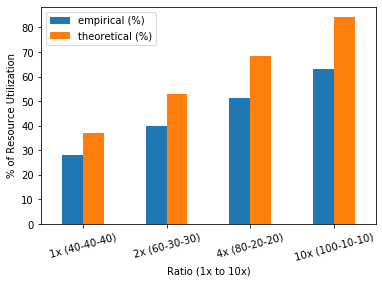

In [3]:
ax = df_1000s.plot.bar('ratio', rot=15)
ax.set_xlabel("Ratio (1x to 10x)")
ax.set_ylabel("% of Resource Utilization")

In [4]:
df_1000s

,ratio,empirical (%),theoretical (%)
40-40-40,1x (40-40-40),28.148,37.00
60-30-30,2x (60-30-30),39.842,52.75
80-20-20,4x (80-20-20),51.362,68.50
100-10-10,10x (100-10-10),63.257,84.25


In [6]:
data_100s = {"40-40-40": 
              ["1x (40-40-40)", 28.148, 100 * ((1000/1000 * 40/120) + (100/1000 * 40/120) + (10/1000 * 40/120))],
              "30-60-30": 
              ["2x (30-60-30)", 22.734, 100 * ((1000/1000 * 30/120) + (100/1000 * 60/120) + (10/1000 * 30/120))],
              "20-80-20": 
              ["4x (20-80-20)", 17.787, 100 * ((1000/1000 * 20/120) + (100/1000 * 80/120) + (10/1000 * 20/120))],
              "10-100-10": 
              ["10x (10-100-10)", 12.661, 100 * ((1000/1000 * 10/120) + (100/1000 * 100/120) + (10/1000 * 10/120))],
             }
df_100s = pd.DataFrame.from_dict(data_100s, orient='index', columns=['ratio','empirical (%)','theoretical (%)'])

### 100s weighted

Text(0, 0.5, '% of Resource Utilization')

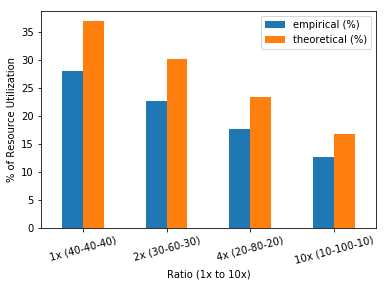

In [7]:
ax = df_100s.plot.bar('ratio', rot=15)
ax.set_xlabel("Ratio (1x to 10x)")
ax.set_ylabel("% of Resource Utilization")

## New equation for resource utilization

$$RU = {\frac{(n_A \times T_A + n_B \times T_B + n_C \times T_C )}{ N_{core} \times TTX}}$$

In [9]:
data_100s_2nd = {"40-40-40": 
              ["1x (40-40-40)", 40 * (1000 + 100 + 10) / 120 * 1000],
              "30-60-30": 
              ["2x (30-60-30)", (30 * 1000 + 60 * 100 + 30 * 10) / 120 * 1000],
              "20-80-20": 
              ["4x (20-80-20)", (20 * 1000 + 80 * 100 + 20 * 10) / 120 * 1000],
              "10-100-10": 
              ["10x (10-100-10)", (10 * 1000 + 100 * 100 + 10 * 10) / 120 * 1000],
             }
df_100s_2nd = pd.DataFrame.from_dict(data_100s_2nd, orient='index', columns=['ratio','Theoretical-Jha'])

Text(0, 0.5, 'Resource Utilization')

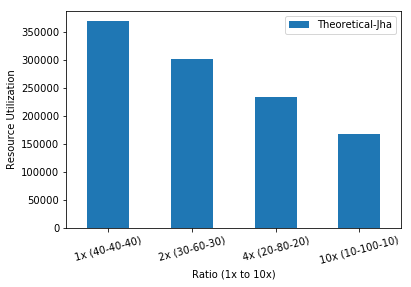

In [11]:
ax = df_100s_2nd.plot.bar('ratio', rot=15)
ax.set_xlabel("Ratio (1x to 10x)")
ax.set_ylabel("Resource Utilization")

In [7]:
df_100s

,ratio,empirical (%),theoretical (%)
40-40-40,1x (40-40-40),28.148,37.00
30-60-30,2x (30-60-30),22.734,30.25
20-80-20,4x (20-80-20),17.787,23.50
10-100-10,10x (10-100-10),12.661,16.75


In [8]:
data_10s = {"40-40-40": 
              ["1x (40-40-40)", 28.148, 100 * ((1000/1000 * 40/120) + (100/1000 * 40/120) + (10/1000 * 40/120))],
              "30-30-60": 
              ["2x (30-30-60)", 21.106, 100 * ((1000/1000 * 30/120) + (100/1000 * 30/120) + (10/1000 * 60/120))],
              "20-20-80": 
              ["4x (20-20-80)", 14.309, 100 * ((1000/1000 * 20/120) + (100/1000 * 20/120) + (10/1000 * 80/120))],
              "10-10-100": 
              ["10x (10-10-100)", 7.550, 100 * ((1000/1000 * 10/120) + (100/1000 * 10/120) + (10/1000 * 100/120))],
             }
df_10s = pd.DataFrame.from_dict(data_10s, orient='index', columns=['ratio','empirical (%)','theoretical (%)'])

### 10s weighted

Text(0, 0.5, '% of Resource Utilization')

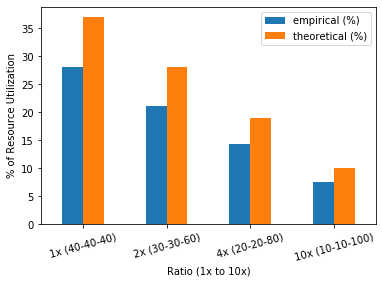

In [9]:
ax = df_10s.plot.bar('ratio', rot=15)
ax.set_xlabel("Ratio (1x to 10x)")
ax.set_ylabel("% of Resource Utilization")

In [10]:
df_10s

,ratio,empirical (%),theoretical (%)
40-40-40,1x (40-40-40),28.148,37.0
30-30-60,2x (30-30-60),21.106,28.0
20-20-80,4x (20-20-80),14.309,19.0
10-10-100,10x (10-10-100),7.550,10.0
